# Graded Challenge 5

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

Dataset berisi transaksi yang dilakukan dengan kartu kredit pada bulan September 2013 oleh pemegang kartu Eropa.
Dataset ini menyajikan transaksi yang terjadi dalam dua hari, dimana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.

In [2]:
# Import Credit Card Dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Showing the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Informasi fitur-fitur pada dataset:

- Fitur V1, V2, … V28 adalah komponen utama yang diperoleh dengan PCA, satu-satunya fitur yang belum diubah dengan PCA adalah 'Time' dan 'Amount'. 
- Fitur 'Time' berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam kumpulan data. 
- Fitur 'Amount' adalah Jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran yang sensitif biaya misalnya-tergantung. 
- Fitur 'Class' adalah variabel respon dan mengambil nilai 1 jika terjadi penipuan dan 0 sebaliknya.

In [4]:
# Show the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Get descriptive statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (284807, 31)


### Data Cleaning
Pertama, kita akan melakukan pengecekan terhadap missing value.

In [7]:
# Missing Value
print('Missing value :','\n', df.isnull().sum())

Missing value : 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Dapat dilihat bahwa tidak adanya missing value.

### Exploratory Data Analysis (EDA)

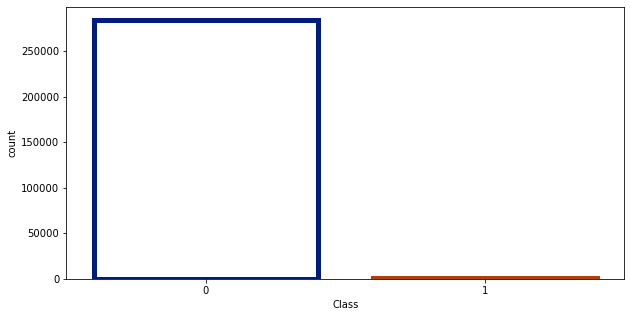

0    284315
1       492
Name: Class, dtype: int64


In [8]:
# Visualize ada berapa fraud di dalam dataset credit card
plt.figure(figsize = (10,5))
sns.countplot(df.Class,facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.show()
print(df.Class.value_counts())

Ada ketidakseimbangan kelas yang sangat tinggi antara **Fraud** dan **Normal**. Kami akan mengeksplorasi beberapa kasus kasus penyeimbangan sebelum membangun model klasifikasi.

In [9]:
a = df.drop('Class', axis = 1)
b = df['Class']
cols = a.columns.tolist()

### Boxplot by Class

Ada outlier tertentu dalam data yang idealnya ingin kami hilangkan. Menghapus terlalu banyak dari mereka akan menghasilkan model yang over/under. Karena sedikit konteks bisnis yang hilang, kami tidak akan menghapusnya untuk saat ini.

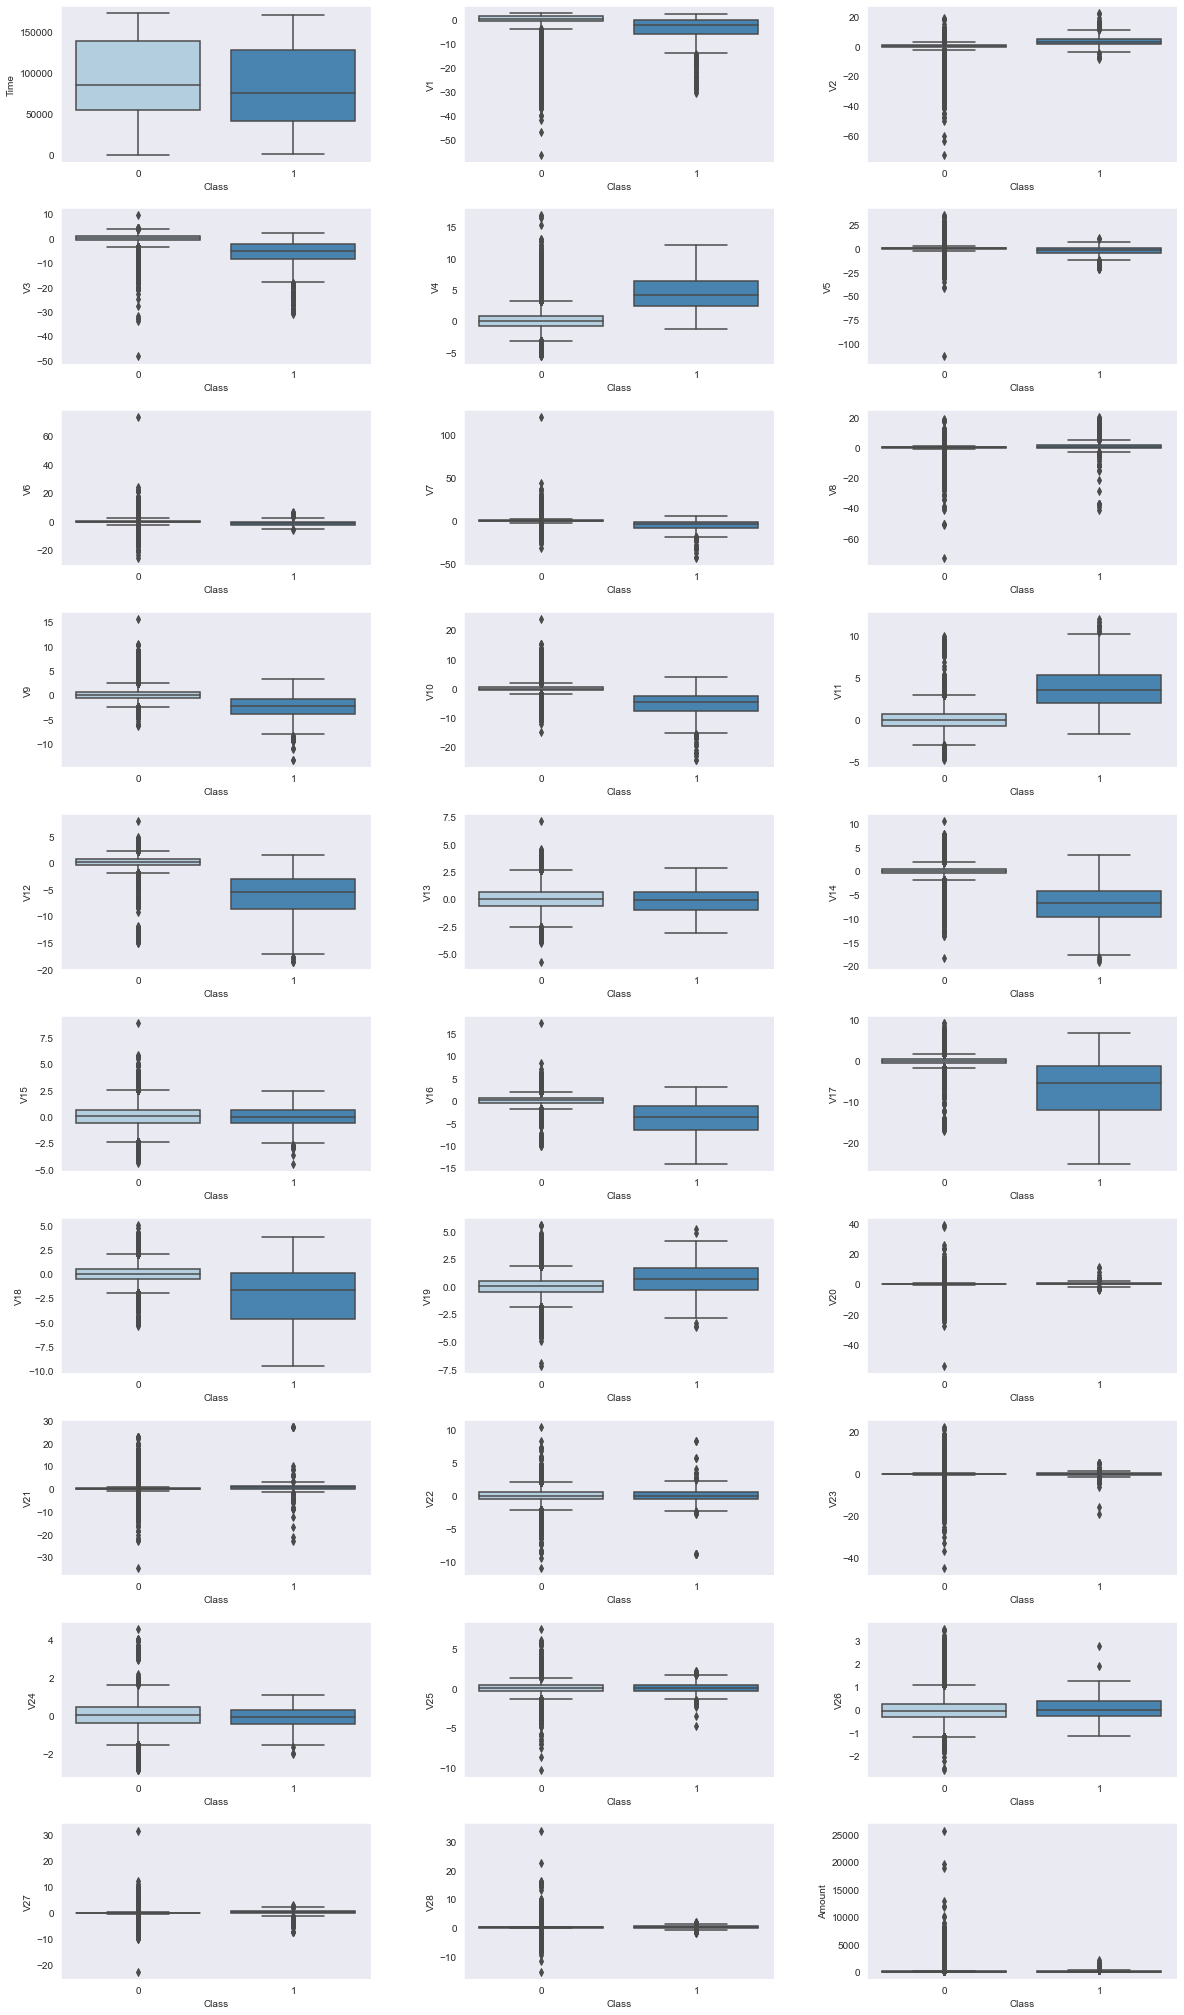

In [10]:
sns.set_style('dark')
fig = plt.figure(figsize= (20,40))
fig.subplots_adjust(hspace = 0.30, wspace = 0.30)
k=0
for i in range(1,len(df.columns)+1):
    ax = fig.add_subplot(11,3,i)
    sns.boxplot(x = 'Class', 
                y = a.columns[k], 
                data = df, 
                palette = 'Blues')
    k = k + 1
    if k == len(a.columns): break
plt.show()

1. Higher values - more likely to be fraud
    - V2, V4, V11, V19
2. Lower values - more likely to be fraud
    - V3, V9, V10, V12, V14, V17, V18

Hal di atas dapat dilihat dari boxplot ini yang mungkin berdampak pada kasus-kasus penipuan.

### Distribution

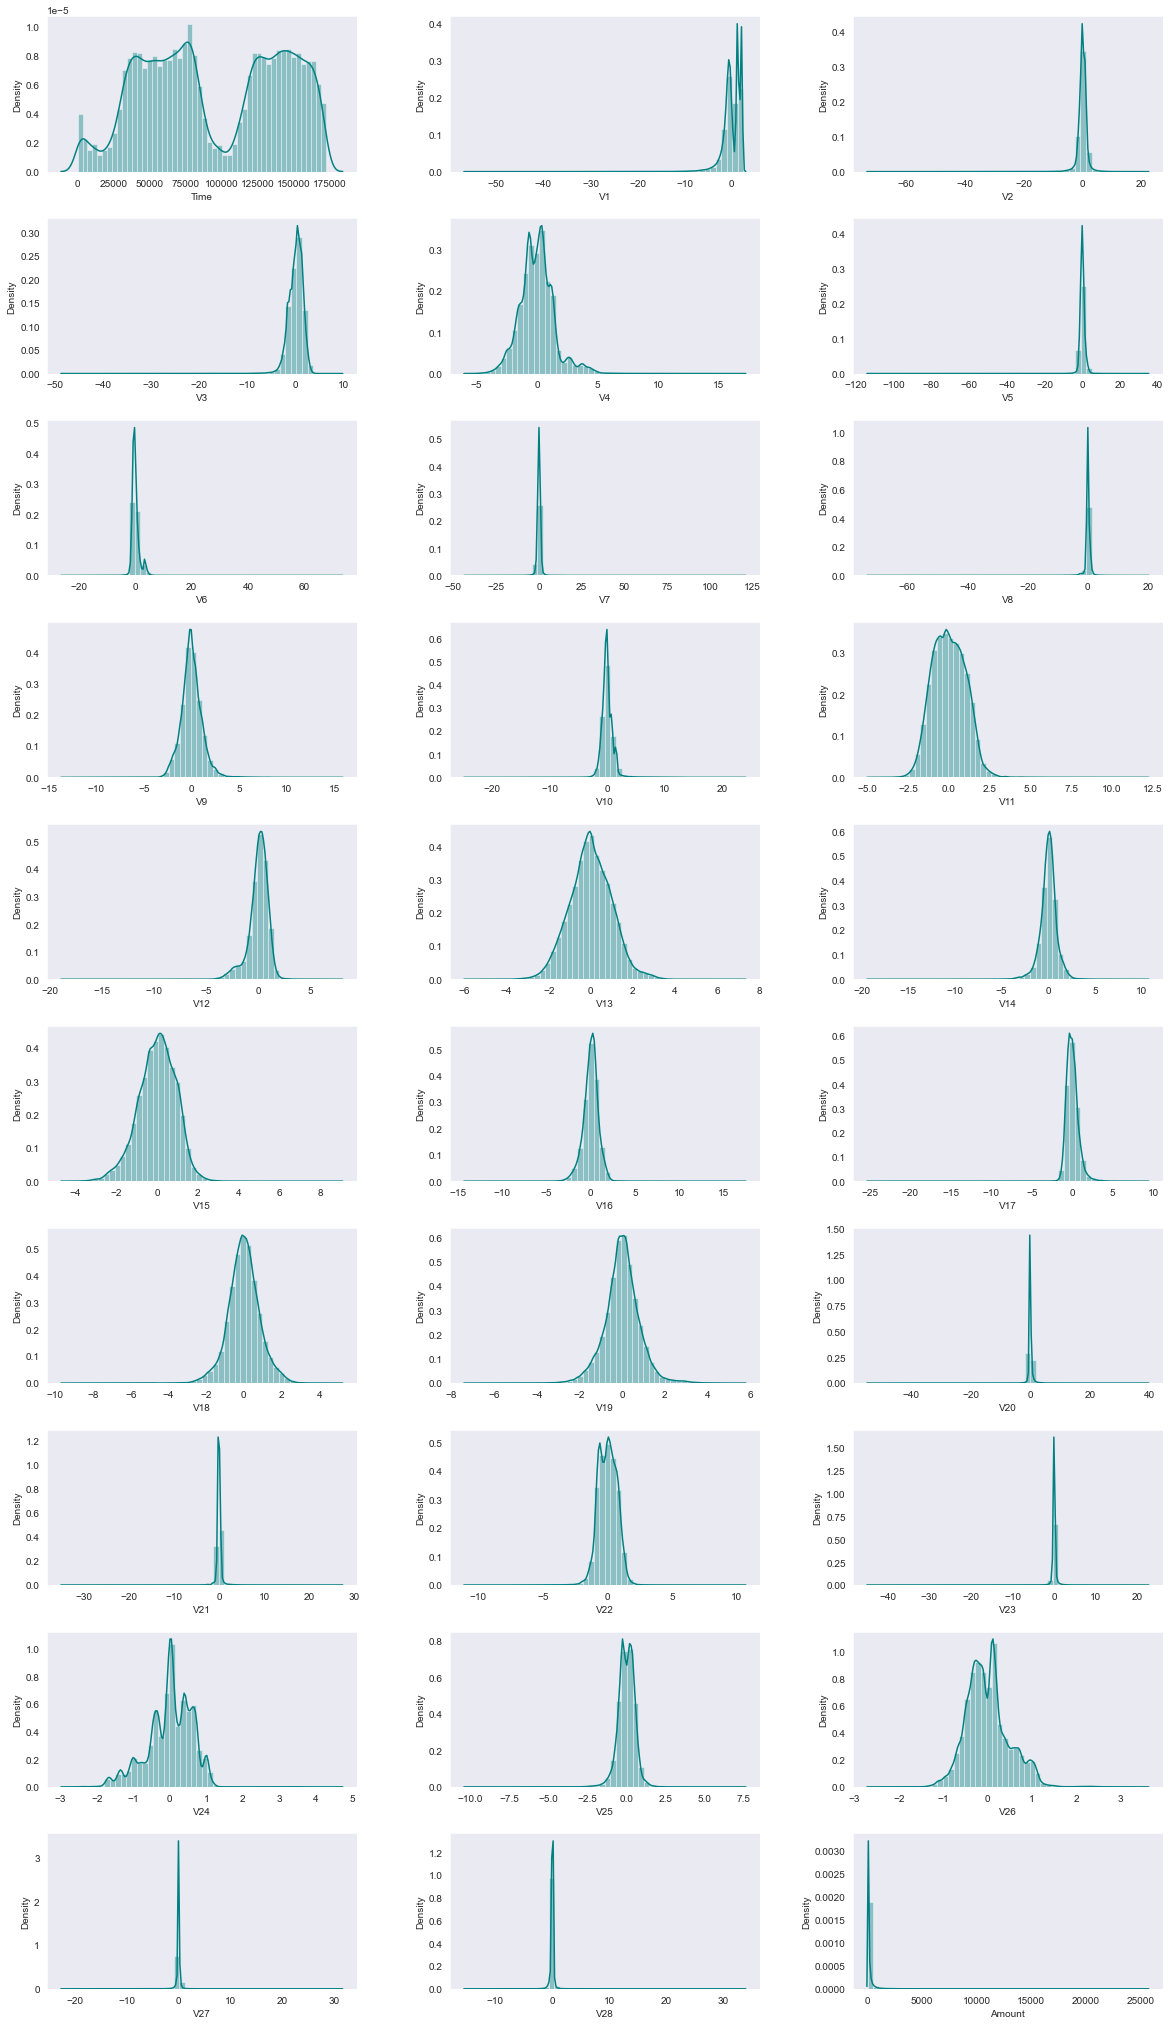

In [11]:
sns.set_style('dark')
fig = plt.figure(figsize = (20,40))
fig.subplots_adjust(hspace = 0.30, 
                    wspace = 0.30)
k=0
for i in range(1, len(a.columns) + 1):
    ax = fig.add_subplot(11, 3, i)
    sns.distplot(a[a.columns[k]], 
                 color = 'teal')
    k = k + 1
    if k == len(a.columns): break
plt.show()

Sebagian besar variabel tampak normal/cenderung normal. Beberapa dari mereka memiliki ekor yang besar, dan kita dapat menganggapnya sebagai outlier yang ekstrim. Kami akan melihat menghapus pos tersebut beberapa fase pemodelan untuk melihat apakah menghapus outlier meningkatkan akurasi model kami.

### Correlation

Text(0.5, 1.0, 'Correlation matrix of the imbalanced data')

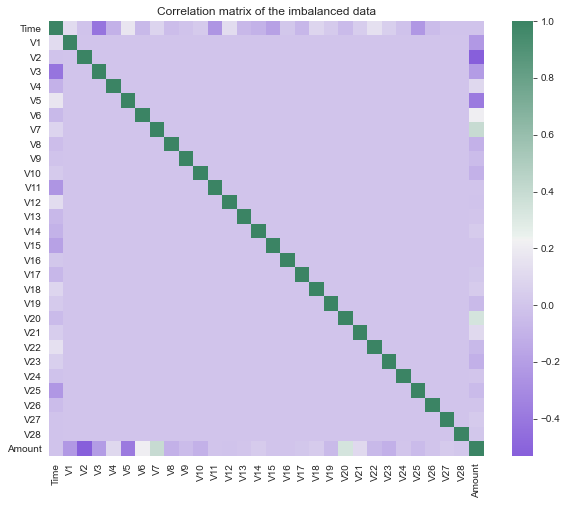

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = a.corr()
sns.heatmap(corr, 
            mask = np.zeros_like(corr, 
                                 dtype=np.bool), 
            cmap = sns.diverging_palette(275, 
                                         150, 
                                         as_cmap=True), 
            square = True, 
            ax = ax)
plt.title('Correlation matrix of the imbalanced data')

Melihat ke atas, aman untuk mengatakan bahwa data tidak berkorelasi dan karenanya kami dapat melanjutkan dengan analisis kami.

### Feature importance using random forest

Kami akan menggunakan model *random forest* untuk memperkirakan fitur penting. Berdasarkan kepentingannya, kami akan menggunakan potongan untuk memilih fitur teratas untuk melatih model kami. Di sini saat memperkirakan pentingnya variabel, setiap kali fitur dijatuhkan dan hilangnya akurasi digunakan untuk memperkirakan pentingnya fitur tertentu.

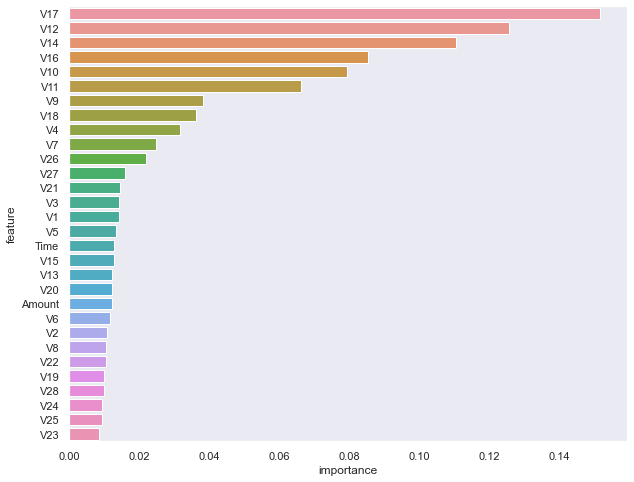

In [13]:
# Mendefinisikan train, test pada X dan y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = .30, random_state = 101)

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 101)
rf.fit(X_train, y_train)

# Feature Importance
fi = rf.feature_importances_

sns.set(style="dark")
fig, ax = plt.subplots(figsize=(10, 8))
var_imp = pd.DataFrame({'feature':cols, 
                        'importance':fi})
var_imp = var_imp.sort_values(ascending=False, 
                              by='importance')
ax = sns.barplot(x='importance', 
                 y='feature', 
                 data=var_imp)

Dapat dilihat diatas urutan mana fitur yang paling penting sampai yang tidak terlalu penting. Kami akan memilih top 3 yaitu fitur **V17**, **V12**, dan **V14** untuk dimasukkan dalam model pelatihan kami

### Data Pre-processing

In [14]:
# Mendefinisikan normal
normal = df[df["Class"]==0]

# Mendefinisikan fraud
fraud = df[df["Class"]==1]

print("Shape of Non-Fraud :", normal.shape)
print("Shape of Fraud     :", fraud.shape)

Shape of Non-Fraud : (284315, 31)
Shape of Fraud     : (492, 31)


In [15]:
# Memilih fitur dari top 3 fitur terpenting
normal = normal[['V12','V14', 'V17','Class']]   
fraud  = fraud[['V12','V14', 'V17', 'Class']]

#### Splitting Data

In [16]:
# Split the normal data
X_train, X_test, y_train, y_test = train_test_split(normal.drop(['Class'],axis=1), 
                                                    normal['Class'] , test_size=0.2, random_state=42)

# Split the fraud data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(fraud.drop(['Class'],axis=1), 
                                                            fraud['Class'] , test_size=0.2, random_state=42)
print("Normal :")
print("Jumlah data train : ", len(X_train))
print("Jumlah data test  : ", len(X_test))
print("------------------------------------------")
print("Fraud  :")
print("Jumlah data train : ", len(X_train_1))
print("Jumlah data test  : ", len(X_test_1))

Normal :
Jumlah data train :  227452
Jumlah data test  :  56863
------------------------------------------
Fraud  :
Jumlah data train :  393
Jumlah data test  :  99


#### Scalling Data

In [17]:
from sklearn.preprocessing import StandardScaler

# Scaling Data "Normal"
n_scale = StandardScaler()
X_train = n_scale.fit_transform(X_train)
X_test = n_scale.transform(X_test)

# Scaling Data "Fraud"
f_scale = StandardScaler()
X_train_1 = f_scale.fit_transform(X_train_1)
X_test_1 = f_scale.transform(X_test_1)

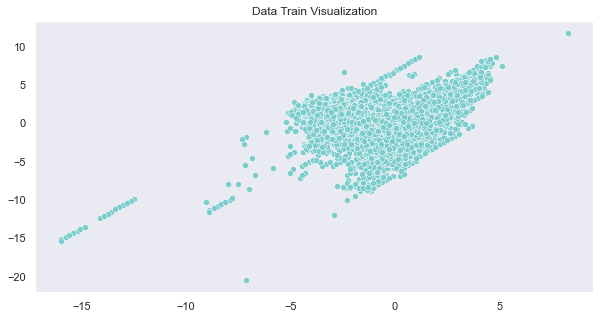

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='#7bcccc')
plt.title('Data Train Visualization')
plt.show()

### Model Definition and Model Training

In [27]:
# Defining the model
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(random_state=42)
gm.fit(X_train)

GaussianMixture(random_state=42)

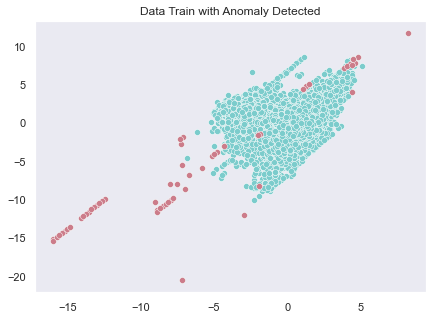

In [36]:
y_train_proba = gm.score_samples(X_train)
density_threshold = np.percentile(y_train_proba,0.025)
anomalies = X_train[y_train_proba < density_threshold]

plt.figure(figsize=(7,5))
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='#7bcccc')
sns.scatterplot(data=anomalies, x=anomalies[:,0], y=anomalies[:,1], color='#cc7c8a')
plt.title('Data Train with Anomaly Detected')
plt.show()

Setelah melakukan *trial and error* threshold yang ditentukan ialah "0.025".

### Model Evaluation
Selanjutnya kita akan membandingkan data belum terdeteksi dan yang sudah terdeteksi anomaly.

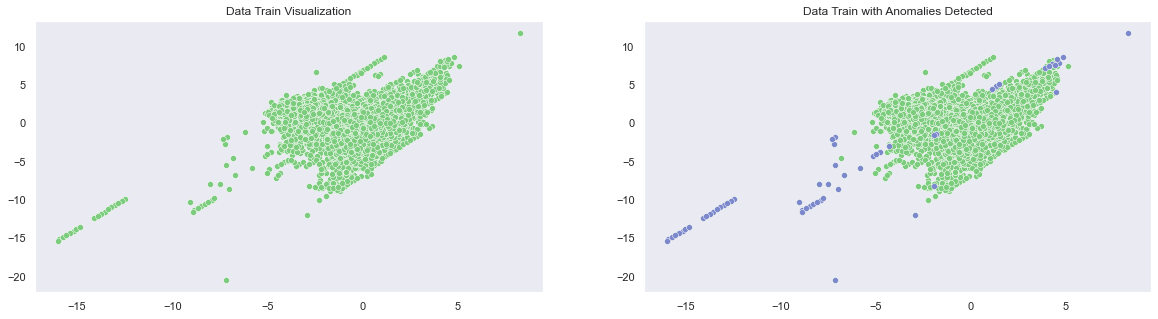

In [37]:
# Visualize the Train Result
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='#7ccc7d')
plt.title('Data Train Visualization')

plt.subplot(1,2,2)
sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], color='#7ccc7d')
sns.scatterplot(data=anomalies, x=anomalies[:,0], y=anomalies[:,1], color='#7c88cc')
plt.title('Data Train with Anomalies Detected')
plt.show()

Sekarang kami memiliki kemungkinan anomali yang terdeteksi untuk kereta data kami.

### Model Inference

In [49]:
new = df.sample(n=3, random_state=42)
new.drop(['Class'], axis=1, inplace=True)
new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00


In [51]:
prep = new[['V12','V14','V17']]
prep = n_scale.transform(prep)
prep

array([[-11.44019726, -10.46146912, -25.62331854],
       [  1.02356895,  -0.25679099,   0.15319358],
       [  0.10886777,  -0.28787341,  -0.72557454]])

In [54]:
new_pred = gm.score_samples(prep)
density_thres = np.percentile(new_pred, 0.025)

new_pred[new_pred>=density_thres]=0
new_pred[new_pred<density_thres]=1

In [55]:
new['result'] = new_pred
new['result'].astype('int32')

43428    1
49906    0
29474    0
Name: result, dtype: int32

### Kesimpulan

- Ada ketidakseimbangan kelas yang sangat tinggi antara Fraud dan Normal.
- Sebagian besar variabel tampak normal/cenderung normal. Beberapa dari mereka memiliki ekor yang besar, dan kita dapat menganggapnya sebagai outlier yang ekstrim.
- Setelah melakukan *Features Importance dengan Random Forest* dan mengambil kesimpulan akan mengambil 3 fitur (V17, V12, dan V14). 
- Setelah melakukan *trial and error* threshold yang ditentukan ialah "0.025".